In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('jena_climate_2009_2016.csv', parse_dates=True, index_col='Date Time')
xt = df['T (degC)']
xt = xt.reset_index(drop=True)

# Reserve the last 1,440 observations for testing
test_size = 1440
train_val_data = xt[:-test_size]
test_data = xt[-test_size:]

# Split the training and validation set
train_size = int(len(train_val_data) * 0.8)
train_data = train_val_data[:train_size]
val_data = train_val_data[train_size:]


In [7]:
# Normalizing the data using mean and std 
mean = train_data.mean()
std = train_data.std()

train_data_norm = (train_data - mean) / std
val_data_norm = (val_data - mean) / std
test_data_norm = (test_data - mean) / std


In [8]:
# Function to create sequences for the model
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        labels.append(data[i+window_size])
    return np.array(sequences), np.array(labels)

# Define the window size to be 144 or 1 day
window_size = 144  

In [9]:
# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_norm.values, window_size)
X_val, y_val = create_sequences(val_data_norm.values, window_size)
X_test, y_test = create_sequences(test_data_norm.values, window_size)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [10]:
# Choosing to build an LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2024-09-30 10:47:22.160111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-30 10:47:22.160574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-30 10:47:22.161003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [11]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/10


2024-09-30 10:47:45.896267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-30 10:47:45.896712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-30 10:47:45.897267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5237/5237 [==============================] - ETA: 0s - loss: 0.0028

2024-09-30 10:50:20.300559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-30 10:50:20.300995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-30 10:50:20.301609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5237/5237 [==============================] - 167s 32ms/step - loss: 0.0028 - val_loss: 6.6061e-04
Epoch 2/10
5237/5237 [==============================] - 184s 35ms/step - loss: 6.2023e-04 - val_loss: 7.0121e-04
Epoch 3/10
5237/5237 [==============================] - 185s 35ms/step - loss: 5.9654e-04 - val_loss: 5.9440e-04
Epoch 4/10
5237/5237 [==============================] - 179s 34ms/step - loss: 5.8718e-04 - val_loss: 6.0052e-04
Epoch 5/10
5237/5237 [==============================] - 178s 34ms/step - loss: 5.8130e-04 - val_loss: 5.9647e-04
Epoch 6/10
5237/5237 [==============================] - 181s 35ms/step - loss: 5.7648e-04 - val_loss: 5.8324e-04
Epoch 7/10
5237/5237 [==============================] - 182s 35ms/step - loss: 5.7330e-04 - val_loss: 5.9464e-04
Epoch 8/10
5237/5237 [==============================] - 176s 34ms/step - loss: 5.7032e-04 - val_loss: 5.9816e-04
Epoch 9/10
5237/5237 [==============================] - 173s 33ms/step - loss: 5.6943e-04 - val_loss: 5.9275e-0

In [13]:
# Make predictions on test set
predictions_norm = model.predict(X_test)

# Denormalizing predictions
predictions = predictions_norm * std + mean 

41/41 [==============================] - 0s 5ms/step


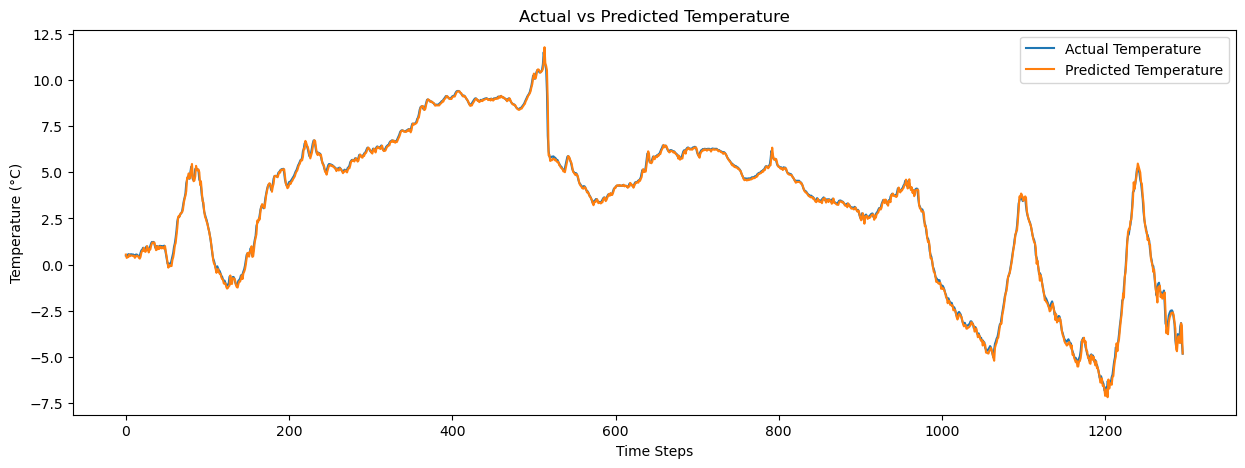

In [15]:
# Actual temperatures for plotting and MSE calc
actual = test_data[window_size:].values

# Plot reserved 1,440 observations along with predictions
plt.figure(figsize=(15, 5))
plt.plot(range(len(actual)), actual, label='Actual Temperature')
plt.plot(range(len(predictions)), predictions.flatten(), label='Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [21]:
# Compute test MSE
test_mse = mean_squared_error(actual, predictions)
print(f'Test MSE of the RNN model: {test_mse}')

# Compute MSE of the persistent forecast (next value same as current)
persistent_predictions = test_data[:-window_size].values  # Shifted by window_size steps
persistent_mse = mean_squared_error(actual, persistent_predictions)
print(f'Test MSE of the persistent forecast: {persistent_mse}')

# Compare the MSEs
if test_mse < persistent_mse:
    print('The RNN model beats the persistent forecast as required.')
else:
    print('Need to revamp')

Test MSE of the RNN model: 0.025888184044268396
Test MSE of the persistent forecast: 10.034208410493827
The RNN model beats the persistent forecast as required.
